In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib qt
# Cargar los datos desde el archivo txt
file_N1 = "datos_t_inter_Neumann1.txt"

data_N1= pd.read_csv(file_N1, delim_whitespace=True, header=None)
data_N1.columns = ["L", "P1", "P2", "t_int"]  # Nombrar las columnas

file_N2 = "datos_t_inter_Neumann2.txt"
data_N2 = pd.read_csv(file_N2, delim_whitespace=True, header=None)
data_N2.columns = ["L", "P1", "P2", "t_int"]  # Nombrar las columnas

file_M1 = "datos_t_inter_Moore1.txt"
data_M1 = pd.read_csv(file_M1, delim_whitespace=True, header=None)
data_M1.columns = ["L", "P1", "P2", "t_int"]  # Nombrar las columnas

file_M2 = "datos_t_inter_Moore2.txt"
data_M2 = pd.read_csv(file_M2, delim_whitespace=True, header=None)
data_M2.columns = ["L", "P1", "P2", "t_int"]  # Nombrar las columnas



# Moore radio 1


In [12]:
L=40
# Filtrar los datos
filtered_data = data_M1[(data_M1["L"] == L)]
# Crear una tabla pivote con P1 (evaluación) en el eje X, P2 (regreso) en el eje Y y t_int como el valor
heatmap_data = filtered_data.pivot_table(index="P2", columns="P1", values="t_int")
# Revertir el orden del índice para que el eje Y no esté al revés
heatmap_data = heatmap_data.sort_index(ascending=False)

# Graficar el heatmap sin anotaciones
plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_data, cmap="rocket", cbar_kws={'label': 't_int (Tiempo de Interacción)'})
plt.title(f"Relación entre P evaluación, P regreso y t_int para L={L} {file_M1[-10:-4]}")
plt.xlabel("P evaluación")
plt.ylabel("P regreso")
plt.show()


In [13]:
file = "datos_t_inter_Moore1_SW.txt"

data= pd.read_csv(file, delim_whitespace=True, header=None)
data.columns = ["L", "P1", "P2", "t_int"]  # Nombrar las columnas

# Filtrar los datos
filtered_data = data[(data["L"] == L)]
# Crear una tabla pivote con P1 (evaluación) en el eje X, P2 (regreso) en el eje Y y t_int como el valor
heatmap_data = filtered_data.pivot_table(index="P2", columns="P1", values="t_int")
# Revertir el orden del índice para que el eje Y no esté al revés
heatmap_data = heatmap_data.sort_index(ascending=False)

# Graficar el heatmap sin anotaciones
plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_data, cmap="rocket", cbar_kws={'label': 't_int (Tiempo de Interacción)'})
plt.title(f"Relación entre P evaluación, P regreso y t_int para L={L} {file[-13:-4]}")
plt.xlabel("P evaluación")
plt.ylabel("P regreso")
plt.show()

In [14]:
file = "datos_t_inter_Moore1_SW05.txt"

data= pd.read_csv(file, delim_whitespace=True, header=None)
data.columns = ["L", "P1", "P2", "t_int"]  # Nombrar las columnas

# Filtrar los datos
filtered_data = data[(data["L"] == L)]
# Crear una tabla pivote con P1 (evaluación) en el eje X, P2 (regreso) en el eje Y y t_int como el valor
heatmap_data = filtered_data.pivot_table(index="P2", columns="P1", values="t_int")
# Revertir el orden del índice para que el eje Y no esté al revés
heatmap_data = heatmap_data.sort_index(ascending=False)

# Graficar el heatmap sin anotaciones
plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_data, cmap="rocket", cbar_kws={'label': 't_int (Tiempo de Interacción)'})
plt.title(f"Relación entre P evaluación, P regreso y t_int para L={L} {file[-15:-4]}")
plt.xlabel("P evaluación")
plt.ylabel("P regreso")
plt.show()

# Neumann1


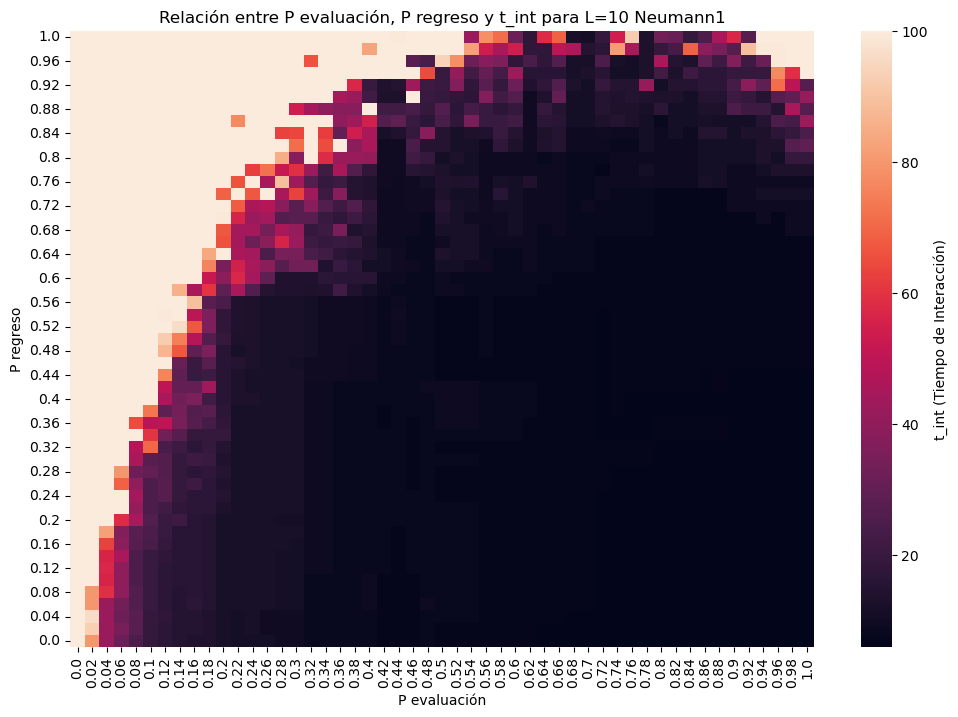

In [21]:

# Filtrar los datos
filtered_data = data_N1[(data_N1["L"] == L)]
# Crear una tabla pivote con P1 (evaluación) en el eje X, P2 (regreso) en el eje Y y t_int como el valor
heatmap_data = filtered_data.pivot_table(index="P2", columns="P1", values="t_int")
# Revertir el orden del índice para que el eje Y no esté al revés
heatmap_data = heatmap_data.sort_index(ascending=False)

# Graficar el heatmap sin anotaciones
plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_data, cmap="rocket", cbar_kws={'label': 't_int (Tiempo de Interacción)'})
plt.title(f"Relación entre P evaluación, P regreso y t_int para L={L} {file_N1[-12:-4]}")
plt.xlabel("P evaluación")
plt.ylabel("P regreso")
plt.show()


# Moore 2


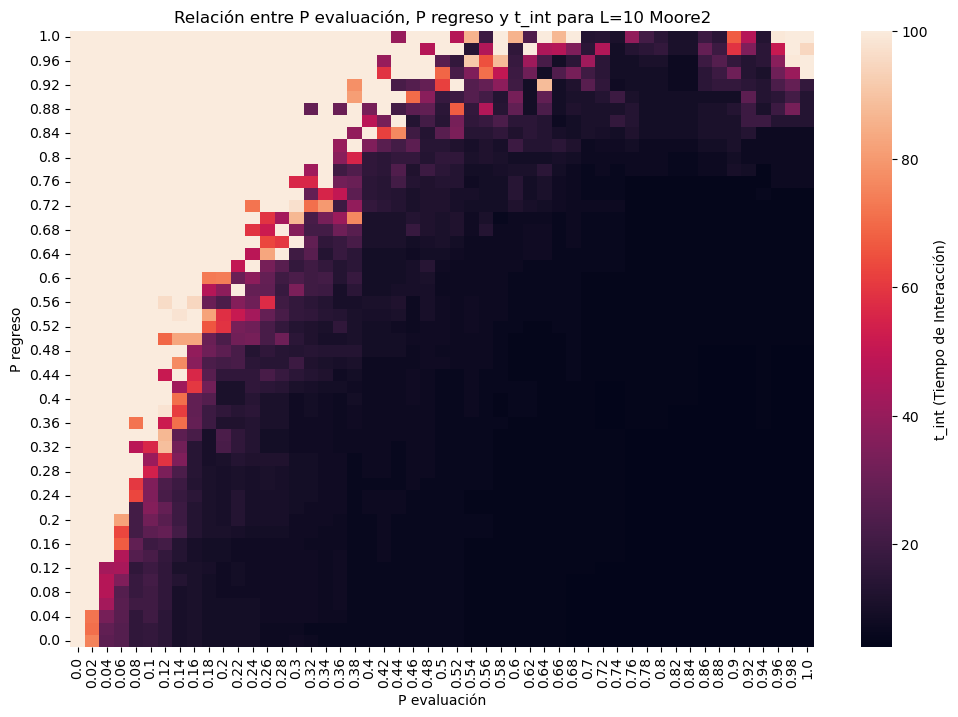

In [ ]:
# Filtrar los datos
filtered_data = data_M2[(data_M2["L"] == L)]
# Crear una tabla pivote con P1 (evaluación) en el eje X, P2 (regreso) en el eje Y y t_int como el valor
heatmap_data = filtered_data.pivot_table(index="P2", columns="P1", values="t_int")
# Revertir el orden del índice para que el eje Y no esté al revés
heatmap_data = heatmap_data.sort_index(ascending=False)

# Graficar el heatmap sin anotaciones
plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_data, cmap="rocket", cbar_kws={'label': 't_int (Tiempo de Interacción)'})
plt.title(f"Relación entre P evaluación, P regreso y t_int para L={L} {file_M2[-10:-4]}")
plt.xlabel("P evaluación")
plt.ylabel("P regreso")
plt.show()


# Neumann 2

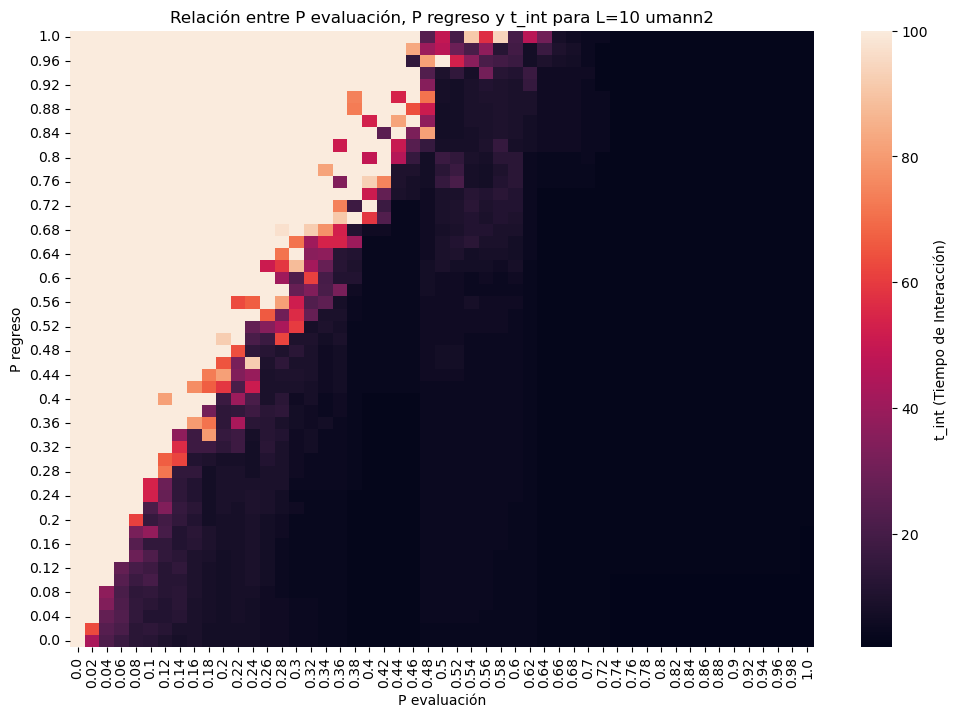

In [23]:

# Filtrar los datos
filtered_data = data_N2[(data_N2["L"] == L)]
# Crear una tabla pivote con P1 (evaluación) en el eje X, P2 (regreso) en el eje Y y t_int como el valor
heatmap_data = filtered_data.pivot_table(index="P2", columns="P1", values="t_int")
# Revertir el orden del índice para que el eje Y no esté al revés
heatmap_data = heatmap_data.sort_index(ascending=False)

# Graficar el heatmap sin anotaciones
plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_data, cmap="rocket", cbar_kws={'label': 't_int (Tiempo de Interacción)'})
plt.title(f"Relación entre P evaluación, P regreso y t_int para L={L} {file_N2[-10:-4]}")
plt.xlabel("P evaluación")
plt.ylabel("P regreso")
plt.show()


In [17]:
import matplotlib.pyplot as plt
import pandas as pd
from mpl_toolkits.mplot3d import Axes3D

# Filtrar los datos
filtered_data = data[(data["L"] == 60) & (data["t_int"] != 100)]

# Crear las variables para los ejes
P1 = filtered_data["P1"]
P2 = filtered_data["P2"]
t_int = filtered_data["t_int"]

# Crear el gráfico 3D
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

# Dibujar los puntos en el gráfico 3D
scatter = ax.scatter(P1, P2, t_int, c=t_int, cmap="rocket", s=50)

# Etiquetas de los ejes
ax.set_title("Relación 3D entre P evaluación, P regreso y t_int")
ax.set_xlabel("P evaluación")
ax.set_ylabel("P regreso")
ax.set_zlabel("t_int (Tiempo de Interacción)")

# Agregar una barra de colores para representar t_int
cbar = fig.colorbar(scatter, ax=ax, pad=0.1)
cbar.set_label("t_int (Tiempo de Interacción)")

plt.show()


In [19]:
# Filtrar los datos
filtered_data = data_moore[(data_moore["L"] == 60 )& (data["t_int"] != 100)]

# Crear las variables para los ejes
P1 = filtered_data["P1"]
P2 = filtered_data["P2"]
t_int = filtered_data["t_int"]

# Crear el gráfico 3D
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

# Dibujar los puntos en el gráfico 3D
scatter = ax.scatter(P1, P2, t_int, c=t_int, cmap="rocket", s=50)

# Etiquetas de los ejes
ax.set_title("Relación 3D entre P evaluación, P regreso y t_int")
ax.set_xlabel("P evaluación")
ax.set_ylabel("P regreso")
ax.set_zlabel("t_int (Tiempo de Interacción)")

# Agregar una barra de colores para representar t_int
cbar = fig.colorbar(scatter, ax=ax, pad=0.1)
cbar.set_label("t_int (Tiempo de Interacción)")

plt.show()